In [8]:
import pandas as pd

df = pd.read_csv("dataset.csv")

df
df.head()
df.tail()
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df["role"].value_counts())

            kill     assist      death     turret
count  10.000000  10.000000  10.000000  10.000000
mean    6.200000   7.300000   4.100000   1.000000
std     4.211096   4.110961   1.911951   1.154701
min     1.000000   2.000000   2.000000   0.000000
25%     2.250000   4.000000   2.250000   0.000000
50%     6.000000   7.000000   4.000000   0.500000
75%     9.750000  10.750000   5.750000   2.000000
max    12.000000  13.000000   7.000000   3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kill    10 non-null     int64 
 1   assist  10 non-null     int64 
 2   death   10 non-null     int64 
 3   turret  10 non-null     int64 
 4   role    10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None
kill      0
assist    0
death     0
turret    0
role      0
dtype: int64
role
penyerang    5
bertahan     5
Name: count, dtype: int64


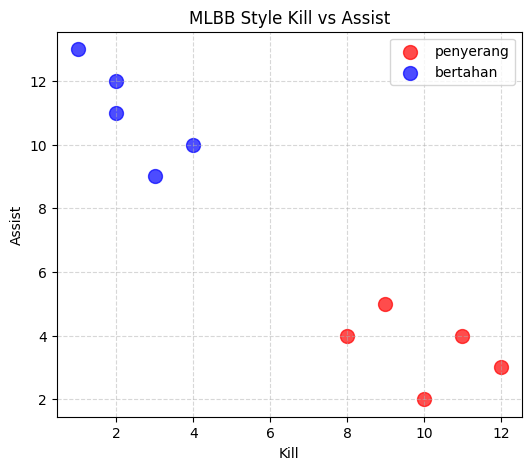

In [9]:
import matplotlib.pyplot as plt

penyerang = df[df["role"]== "penyerang"]
bertahan = df[df["role"] == "bertahan"]

plt.figure(figsize=(6,5))
plt.scatter(penyerang["kill"], penyerang["assist"], color="red", s=100,alpha=0.7,label="penyerang")
plt.scatter(bertahan["kill"], bertahan["assist"], color="blue", s=100,alpha=0.7,label="bertahan")

plt.xlabel("Kill")
plt.ylabel("Assist")
plt.title("MLBB Style Kill vs Assist")
plt.legend()
plt.grid(True,linestyle="--", alpha=0.5)
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[["kill","assist","death","turret"]]
y = df["role"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 1.0


In [22]:
data_baru = pd.DataFrame([[1,12,7,0]], columns=["kill","assist","death","turret"])
model.predict(data_baru)[0]

'bertahan'

In [23]:
 data_lain = pd.DataFrame([[11,8,2,2]], columns=["kill","assist","death","turret"])
 model.predict(data_lain)

array(['penyerang'], dtype=object)

In [24]:
import joblib 
joblib.dump(model, "mlbb_model.joblib")

['mlbb_model.joblib']

In [25]:
import joblib
import pandas as pd
loaded_model = joblib.load("mlbb_model.joblib")
data_baru = pd.DataFrame([[3,9,5,1]], columns=["kill","assist","death","turret"])
loaded_model.predict(data_baru)

array(['bertahan'], dtype=object)